# Relative Drug Bandit
### Hannah/Patrick/John

Possible aims for a bandit:
    - to minimize the uncertainty of the overall map
    - to prioritise simulating the highest affinity ligands
    - rank order the ligands as rapidly as possible
    
Two things that can be treated as an arm
    - an edge (A - B), containing a combination of all mappings (and possibly combinations of edges A - C - B)
    - all possible edges (intra-edge)
    
   

Here: optimising rank-ordering ligands, assuming there is one mapping per edge

In [1]:
from drugbandit import bandit, pull, choose
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# import random
import itertools
# from random import randint

%matplotlib inline

In [8]:
def plotbanditsvsexperiment(bandits):
    '''
    Plots the Bandit's expected free energy and error against the experimental free energy and error
    '''
    experimental = [arm.fe for arm in bandits]
    experimental_error = [arm.error for arm in bandits]

    calculated = [arm.nu for arm in bandits]
    calculated_error = [arm.sigma for arm in bandits]

    plt.errorbar(experimental,calculated,xerr=experimental_error,yerr=calculated_error,fmt='o',ms=0,color='k',alpha=0.3)
    plt.scatter(experimental,calculated)
    plt.plot(experimental,experimental,color='b',alpha=0.2)
    plt.xlabel('Experimental / kcal mol$^{-1}$')
    plt.ylabel('Calculated / kcal mol$^{-1}$')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    return

In [9]:
ligands = []

with open('set_of_eight.smiles','r') as f:
    index = 0
    for line in f:
        if line[0] != '#':
            details = line.split(';')
            ligands.append([details[2], float(details[3]), float(details[4])])

index = 0
rel_bandits = []
for lig_a, lig_b in itertools.combinations(ligands,2):  # generating all edges
#    name, exp_fe, exp_error
    rel_name = lig_a[0]+'-'+lig_b[0]
    rel_fe = lig_a[1] - lig_b[1]
    rel_error = np.sqrt(lig_a[2]**2 + lig_b[2]**2)
#     print(rel_name,rel_fe,rel_error)
    rel_bandits.append(bandit.Bandit(rel_name,rel_fe,rel_error,index))
    index+=1
    
    
for band in rel_bandits:
    print(band.name)

benzene-phenol
benzene-toluene
benzene-trifluoromethylbenzene
benzene-1,2-bis(trifluoromethyl)benzene
benzene-chlorobenzene
benzene-2-chlorophenol
benzene-benzenethiol
phenol-toluene
phenol-trifluoromethylbenzene
phenol-1,2-bis(trifluoromethyl)benzene
phenol-chlorobenzene
phenol-2-chlorophenol
phenol-benzenethiol
toluene-trifluoromethylbenzene
toluene-1,2-bis(trifluoromethyl)benzene
toluene-chlorobenzene
toluene-2-chlorophenol
toluene-benzenethiol
trifluoromethylbenzene-1,2-bis(trifluoromethyl)benzene
trifluoromethylbenzene-chlorobenzene
trifluoromethylbenzene-2-chlorophenol
trifluoromethylbenzene-benzenethiol
1,2-bis(trifluoromethyl)benzene-chlorobenzene
1,2-bis(trifluoromethyl)benzene-2-chlorophenol
1,2-bis(trifluoromethyl)benzene-benzenethiol
chlorobenzene-2-chlorophenol
chlorobenzene-benzenethiol
2-chlorophenol-benzenethiol


Step 250


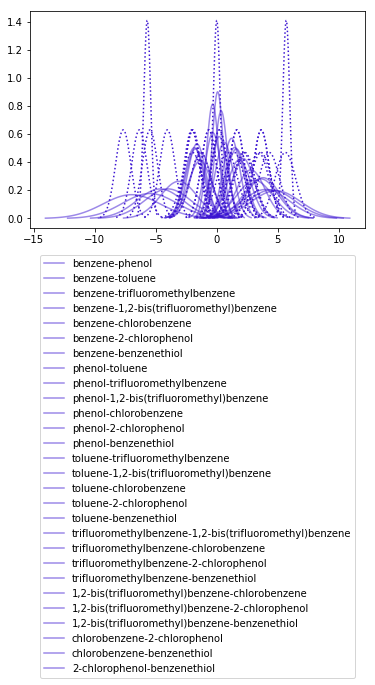

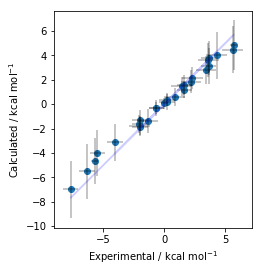

Step 500


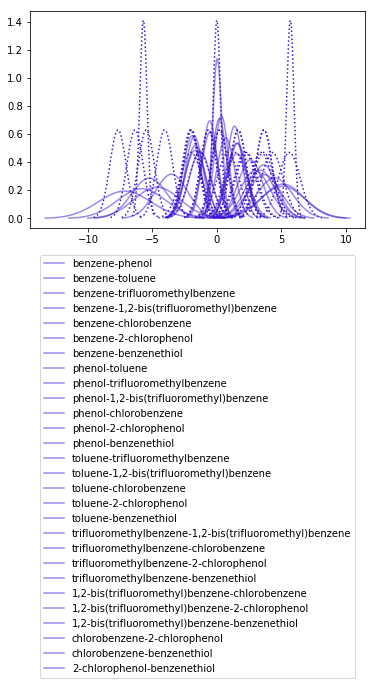

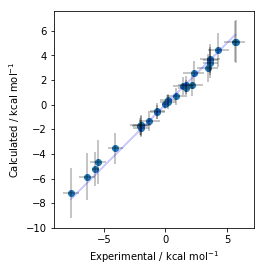

Step 750


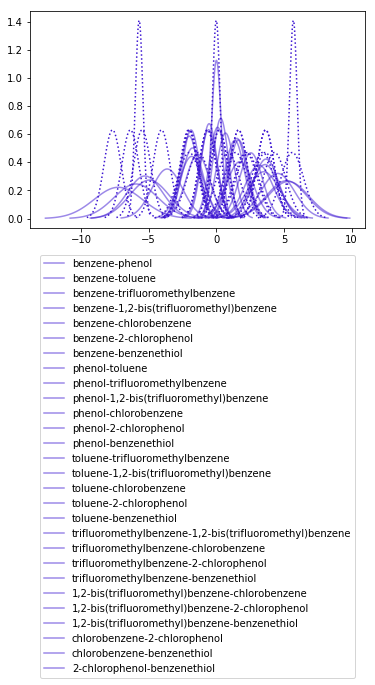

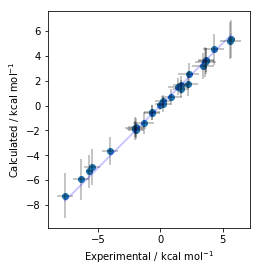

Step 1000


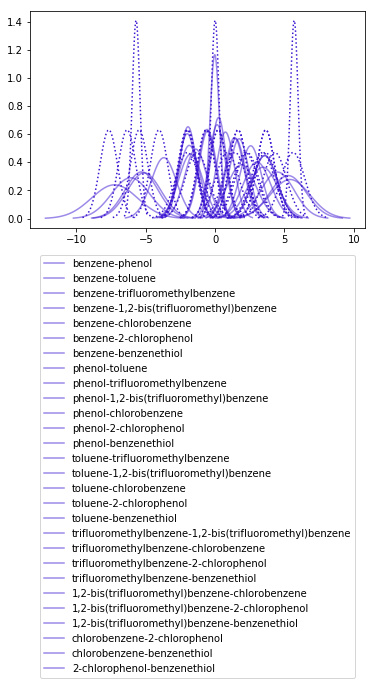

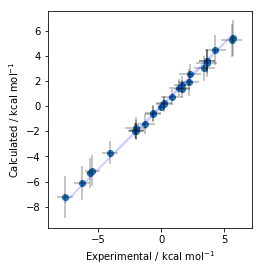

In [10]:
bandit_steps = 1000
for step in range(1,bandit_steps+1):
    # Boltzmann sampling 
    pick_bandit = choose.boltzmann_ranking(rel_bandits,5)
    reward = pull.Pull(pick_bandit)
#     print(pick_bandit.name)
    pick_bandit.update(reward)
    
    if step % 250 == 0:
        print('Step {}'.format(step))
        ax = plt.subplot(1, 1, 1)
        for bandit in rel_bandits:
            bandit.plot()
        handles, labels = ax.get_legend_handles_labels()
        lgd = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
        plt.show()
        
        plotbanditsvsexperiment(rel_bandits)

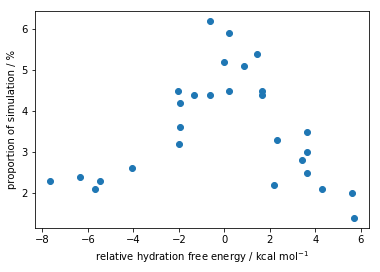

In [11]:
x = [bandit.fe for bandit in rel_bandits]
y = [(bandit.nsteps*100)/bandit_steps for bandit in rel_bandits]

plt.scatter(x,y)
plt.xlabel('relative hydration free energy / kcal mol$^{-1}$')
plt.ylabel('proportion of simulation / %')
plt.show()

### bandits on mappings instead of edges

In [9]:
ligands = []

with open('set_of_eight.smiles','r') as f:
    index = 0
    for line in f:
        if line[0] != '#':
            details = line.split(';')
            ligands.append([details[2], float(details[3]), float(details[4])])

index = 0
rel_bandits = []
noisy = [1.,2.]
for noise in noisy:
    for lig_a, lig_b in itertools.combinations(ligands[0:3],2):  # generating all edges
    #    name, exp_fe, exp_error
        rel_name = lig_a[0]+'-'+lig_b[0]
        rel_fe = lig_a[1] - lig_b[1]
        rel_error = noise*np.sqrt(lig_a[2]**2 + lig_b[2]**2)
        rel_bandits.append(bandit.Bandit(rel_name,rel_fe,rel_error,index))
        index+=1

benzene-phenol
0.28284271247461906
benzene-toluene
0.28284271247461906
phenol-toluene
0.28284271247461906
benzene-phenol
0.5656854249492381
benzene-toluene
0.5656854249492381
phenol-toluene
0.5656854249492381
